# Install/Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [66]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Data Cleaning & Preprocessing

In [ ]:
df1 = pd.read_csv('../Dataset/raw/Bitcoin Historical From 2010 to 2025.csv')
df2 = pd.read_csv('../Dataset/raw/Bitcoin Historical Data.csv')


In [23]:
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      45 non-null     datetime64[ns]
 1   Price     45 non-null     object        
 2   Open      45 non-null     object        
 3   High      45 non-null     object        
 4   Low       45 non-null     object        
 5   Vol.      45 non-null     object        
 6   Change %  45 non-null     object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.6+ KB


In [32]:
df1.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
1,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
3,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%


In [31]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-06-04,"105,482.6","105,383.5","105,841.0","105,148.7",46.67K,0.09%
1,2025-06-03,"105,388.3","105,845.6","106,758.4","104,886.9",49.47K,-0.43%
2,2025-06-02,"105,845.6","105,635.2","105,930.7","103,729.7",46.44K,0.20%
3,2025-06-01,"105,635.2","104,598.0","105,867.5","103,768.6",33.03K,0.99%
4,2025-05-31,"104,598.0","103,981.9","104,888.4","103,091.3",35.80K,0.59%


gabungin dataset


In [33]:

merged_df = pd.concat([df1, df2])


merged_df = merged_df.drop_duplicates(subset='Date')

merged_df = merged_df.sort_values('Date').reset_index(drop=True)


In [34]:
merged_df.to_csv('../Dataset/processed/Bitcoin_HistoricalPrice.csv', index=False)


bersihin Dataset yg udah di merge

In [63]:
df = pd.read_csv('../Dataset/processed/Bitcoin_HistoricalPrice.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      5436 non-null   object
 1   Price     5436 non-null   object
 2   Open      5436 non-null   object
 3   High      5436 non-null   object
 4   Low       5436 non-null   object
 5   Vol.      5430 non-null   object
 6   Change %  5436 non-null   object
dtypes: object(7)
memory usage: 297.4+ KB


ganti nama kolom

In [69]:
df.columns = df.columns.astype(str).str.strip().str.lower()
df = df.rename(columns={
    'date': 'date',
    'price': 'price',
    'open': 'open',
    'high': 'high',
    'low': 'low',
    'vol.': 'volume',
    'change %': 'change'
})



In [ ]:
ngilanngin tanda char kaya % '' dll, sekalian ganti datatype dari object ke float

In [70]:
def convert_shorthand(x):
    x = str(x).replace(',', '').replace('%', '').strip()
    if x == '-' or x == '':
        return None
    if x.endswith('K'):
        return float(x[:-1]) * 1_000
    elif x.endswith('M'):
        return float(x[:-1]) * 1_000_000
    elif x.endswith('B'):
        return float(x[:-1]) * 1_000_000_000
    else:
        return float(x)

for col in ['price', 'open', 'high', 'low', 'change']:
    df[col] = (
        df[col].astype(str)
               .str.replace(',', '')
               .str.replace('%', '')
               .replace('-', None)
               .astype(float)
    )

df['volume'] = df['volume'].apply(convert_shorthand)


In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5436 non-null   object 
 1   price   5436 non-null   float64
 2   open    5436 non-null   float64
 3   high    5436 non-null   float64
 4   low     5436 non-null   float64
 5   volume  5430 non-null   float64
 6   change  5436 non-null   float64
dtypes: float64(6), object(1)
memory usage: 297.4+ KB


In [72]:
print(df['price'].dtype)
print(df['price'].isnull().sum())

float64
0


In [73]:

df.head(10)

,date,price,open,high,low,volume,change
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0
5,2010-07-23,0.1,0.1,0.1,0.1,2400.0,0.0
6,2010-07-24,0.1,0.1,0.1,0.1,500.0,0.0
7,2010-07-25,0.1,0.1,0.1,0.1,1550.0,0.0
8,2010-07-26,0.1,0.1,0.1,0.1,880.0,0.0
9,2010-07-27,0.1,0.1,0.1,0.1,3370.0,0.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5436 non-null   object 
 1   price   5436 non-null   float64
 2   open    5436 non-null   float64
 3   high    5436 non-null   float64
 4   low     5436 non-null   float64
 5   volume  5430 non-null   float64
 6   change  5436 non-null   float64
dtypes: float64(6), object(1)
memory usage: 297.4+ KB


kita gausah pakai ma ema rsi, karena kita bakal cuma pake beberapa kolom yg bisa didapat dari api realtime

In [ ]:
#Moving Average
#df['ma7'] = df['price'].rolling(window=7).mean()
#df['ma30'] = df['price'].rolling(window=30).mean()

In [ ]:
# Exponential Moving Average
#df['ema7'] = df['price'].ewm(span=7, adjust=False).mean()
#df['ema30'] = df['price'].ewm(span=30, adjust=False).mean()


In [ ]:
# relative strenth index
#def compute_rsi(data, window=14):
#    delta = data.diff()
#    gain = delta.clip(lower=0)
#    loss = -delta.clip(upper=0)
#    avg_gain = gain.rolling(window).mean()
#    avg_loss = loss.rolling(window).mean()
#    rs = avg_gain / avg_loss
#    rsi = 100 - (100 / (1 + rs))
#    return rsi
#
#df['rsi'] = compute_rsi(df['price'])


In [82]:
df['next_price'] = df['price'].shift(-1)
df['target_candle'] = (df['next_price'] > df['price']).astype(int)


In [75]:
print(df.isnull().sum())


date      0
price     0
open      0
high      0
low       0
volume    6
change    0
dtype: int64


ngehapus kolom yang nilai si volumenya kosong

In [76]:

df.dropna(inplace=True)

print(df.isnull().sum())


date      0
price     0
open      0
high      0
low       0
volume    0
change    0
dtype: int64


In [ ]:
from scipy.stats import zscore
#df['zscore_price'] = zscore(df['price'])
#
## Tampilkan data dengan z-score tinggi (misalnya > 3 atau < -3)
#outliers = df[(df['zscore_price'].abs() > 3)]
#print(outliers.head())
#

            date    price     open     high      low    volume  change  \
5232  2024-11-13  90422.2  87971.2  93226.6  86168.4  257570.0    2.82   
5234  2024-11-15  91046.5  87297.2  91833.1  87118.8  158190.0    4.30   
5235  2024-11-16  90539.1  91035.3  91748.9  90079.0   79820.0   -0.56   
5236  2024-11-17  89833.7  90569.4  91441.6  88736.1   81240.0   -0.78   
5237  2024-11-18  90478.7  89843.3  92567.1  89410.4  150470.0    0.72   

      zscore_price  
5232      3.038246  
5234      3.063832  
5235      3.043037  
5236      3.014127  
5237      3.040561  


In [85]:
df.to_csv('../Dataset/Historical/HistoricalData.csv')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5430 entries, 0 to 5435
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5430 non-null   object 
 1   price   5430 non-null   float64
 2   open    5430 non-null   float64
 3   high    5430 non-null   float64
 4   low     5430 non-null   float64
 5   volume  5430 non-null   float64
 6   change  5430 non-null   float64
dtypes: float64(6), object(1)
memory usage: 339.4+ KB


# Data Exploration

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.to_period('M')
df['week'] = df['date'].dt.to_period('W')
df['day'] = df['date'].dt.date

rata rata pertahun

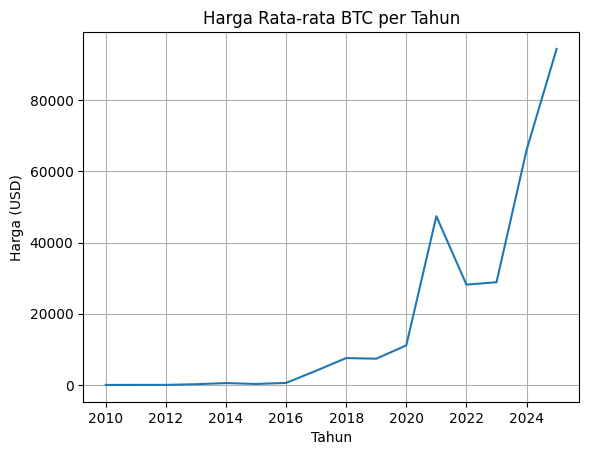

In [59]:

df.groupby('year')['price'].mean().plot(kind='line', title='Harga Rata-rata BTC per Tahun')

plt.ylabel('Harga (USD)')
plt.xlabel('Tahun')
plt.grid(True)
plt.show()


perbulan

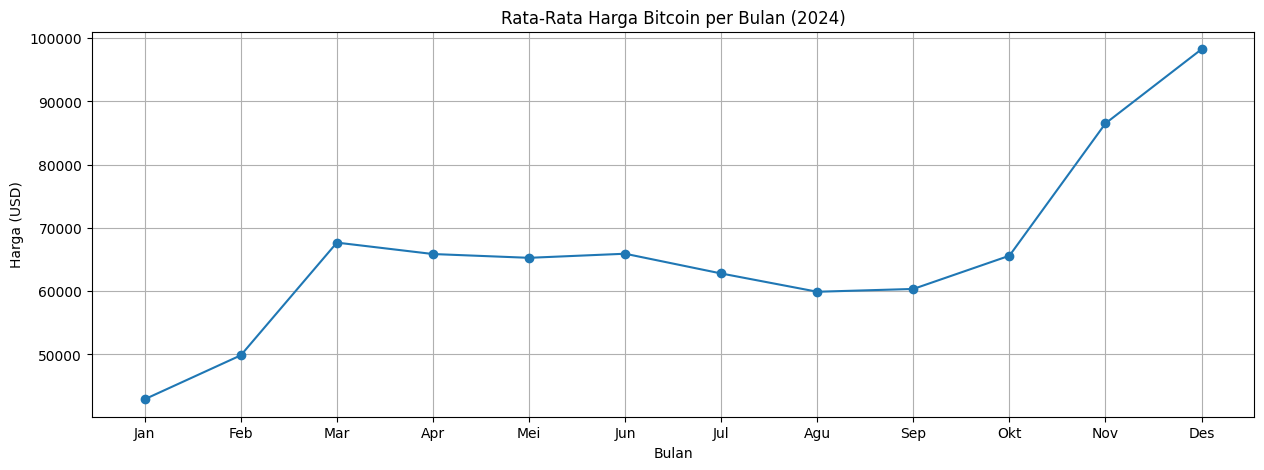

In [60]:


df_2024 = df[df['date'].dt.year == 2024].copy()
df_2024['month'] = df_2024['date'].dt.month

avg_price_per_month_2024 = df_2024.groupby('month')['price'].mean()

avg_price_per_month_2024.plot(kind='line', marker='o', figsize=(15,5), title='Rata-Rata Harga Bitcoin per Bulan (2024)')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.ylabel('Harga (USD)')
plt.xlabel('Bulan')
plt.grid(True)

plt.show()


In [2]:
#Mingguan
# Tambahkan kolom minggu
#df['week'] = df['date'].dt.strftime('%Y-%U')  # Misalnya: '2024-16'
#
## Rata-rata harga per minggu
#weekly_avg = df.groupby('week')['price'].mean().reset_index()
#
## Ambil 12 minggu terakhir
#last_12_weeks = weekly_avg.tail(12)
#
## Plot
#plt.figure(figsize=(14, 5))
#plt.plot(last_12_weeks['week'], last_12_weeks['price'], marker='o')
#plt.title('Rata-rata Harga Bitcoin - 12 Minggu Terakhir')
#plt.xlabel('Minggu ke-')
#plt.ylabel('Harga (USD)')
#plt.grid(True)
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()


harian

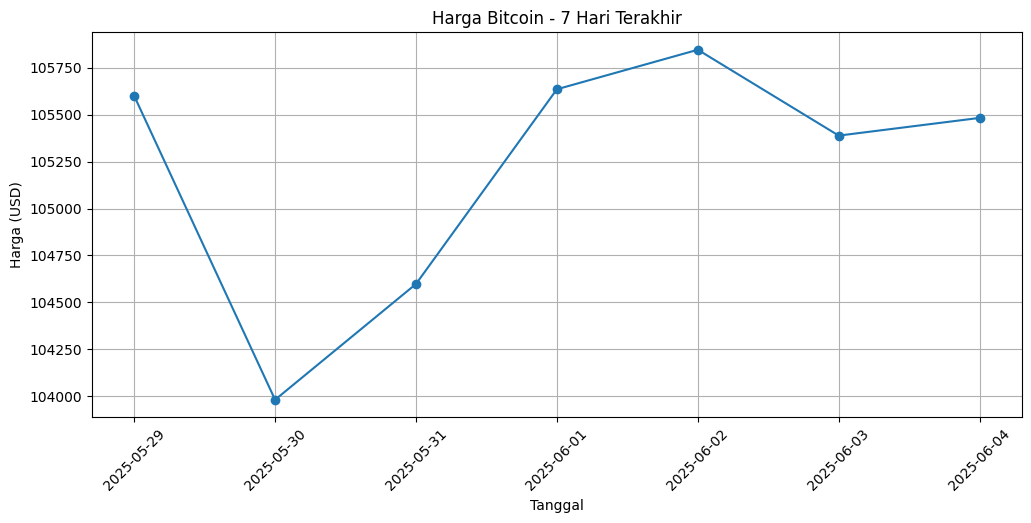

In [61]:


df['date'] = pd.to_datetime(df['date'])

# Urutkan berdasarkan tanggal
df = df.sort_values('date')

# Ambil 7 hari terakhir
last_7_days = df.tail(7)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(last_7_days['date'], last_7_days['price'], marker='o', linestyle='-')
plt.title('Harga Bitcoin - 7 Hari Terakhir')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [1]:
#df['candle_trend'] = df.apply(lambda row: 'bullish' if row['price'] > row['open'] else 'bearish', axis=1)
#candle_counts = df['candle_trend'].value_counts()
#
#candle_counts.plot(kind='bar', color=['green', 'red'], title='Klasifikasi Candlestick Harian')
#plt.ylabel('Jumlah Hari')
#plt.grid(True)
#plt.show()


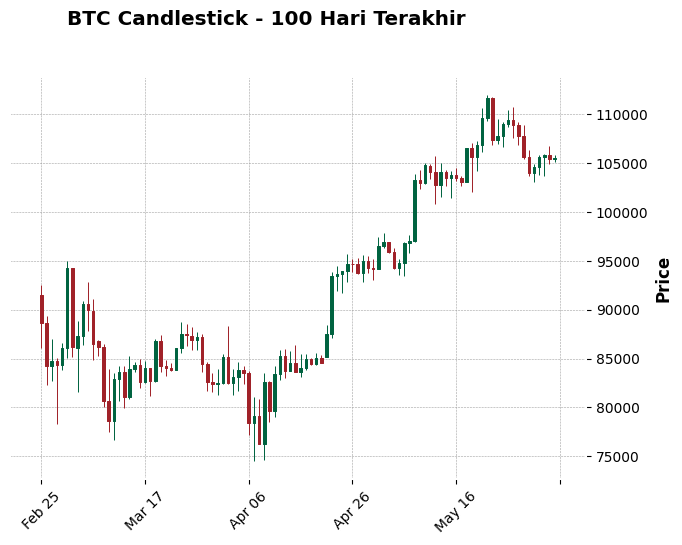

In [62]:
import mplfinance as mpf

btc_candle = df.set_index('date')[['open', 'high', 'low', 'price']]
btc_candle = btc_candle.rename(columns={'price': 'close'})

mpf.plot(btc_candle[-100:], type='candle', style='charles', title='BTC Candlestick - 100 Hari Terakhir')